<a href="https://colab.research.google.com/github/JalajakshiP/WIDS-Agent-Jackie-Reinforcement-Learning/blob/main/week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **MOUNTING GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
import matplotlib.pyplot as plt

### **Linear Regresion model**

In [ ]:
class LinearRegression:

    def __init__(self):
         #initialize using some parameters. Think what could be a parameter.
         self.w=np.random.rand()
         self.b=np.random.rand()

    def fit(self,X,y):
        #this function does you main job that it training the model. What does training your model mean? In the end it should just update your weights and biases so that the model has been 'fitted' to your data. This is the function where your main training loop and gradient calculation will be present.
        learning_rate=0.001
        m=len(X)
        for j in range(10000):
          predicted_outputs = np.dot(X, self.w) + self.b
          jw = (1/m) * np.dot(X.T, (predicted_outputs-y))
          jb = (1/m) * np.sum(predicted_outputs-y)
          self.w=self.w-learning_rate*jw
          self.b=self.b-learning_rate*jb

    def predict(self, X):
        #this function can be used to predict the target value using weights and biases
        return np.dot(self.w,X)+self.b


### **Importing the dataset**

In [ ]:
data = pd.read_csv("/content/train.csv")
data

,row_id,feature,target
0,0,2.981457,5.393127
1,1,4.073529,5.842601
2,2,9.272826,7.384454
3,3,0.705137,4.606203
4,4,7.241643,6.553693
...,...,...,...
1045,1045,3.769486,5.975355
1046,1046,1.661592,4.717327
1047,1047,6.077923,6.749978
1048,1048,3.963448,6.339758


### further splitting of "train.csv" dataset into training and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(data.feature, data.target, test_size = 0.2)
x_train=np.array(X_train)
y_train=np.array(Y_train)
x_test=np.array(X_test)
y_test=np.array(Y_test)

### **Fit the training data to linear regression model**

In [ ]:
#after defining the class, construct it and then fit and predict.
lr = LinearRegression()
lr.fit(x_train,y_train)

### **Predicted output for x_test**

In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([5.28776205, 7.00729285, 6.83847776, 6.31599558, 5.80063409,
       6.3766454 , 7.30270456, 5.66204468, 6.32933076, 6.06614356,
       5.25239518, 7.60008564, 6.02430461, 6.58857134, 5.63054294,
       7.15595803, 6.27921098, 6.39715036, 4.59853836, 6.02214098,
       4.65592233, 6.83752965, 5.71995746, 6.56681944, 4.82426004,
       5.7146983 , 4.91600056, 5.33743703, 6.65834721, 5.85864465,
       4.84200646, 4.75100778, 7.38408427, 5.29734222, 4.4876309 ,
       4.77450461, 6.3847616 , 5.89054664, 7.58815377, 6.08578771,
       6.40482788, 7.55118706, 5.39257854, 6.64386417, 4.62364822,
       5.17389711, 5.17808631, 7.25019964, 4.94378133, 4.67207845,
       5.69185446, 7.26996406, 6.12310541, 6.06537009, 6.72525208,
       7.51781011, 6.32045228, 6.9849701 , 5.72557143, 5.77326951,
       5.36315455, 5.29545989, 7.3245813 , 7.52296142, 7.65706363,
       6.9668504 , 6.88426203, 7.1899403 , 4.65023262, 6.22974153,
       5.21726746, 7.23276836, 4.74005055, 4.66453506, 7.11922

## **Actual vs predicted output for x_test**

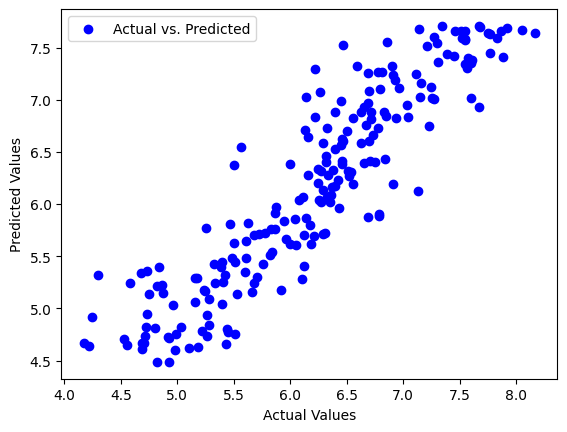

In [ ]:
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


### **Import test_data set and predict outputs corresponding to it**

In [ ]:
test_data=pd.read_csv("/content/test.csv")
test_data

,row_id,feature
0,0,1.160535
1,1,9.869024
2,2,5.611131
3,3,0.328108
4,4,8.794113
...,...,...
445,445,1.666243
446,446,6.718031
447,447,3.277955
448,448,0.420212


In [ ]:
test_input=np.array(test_data.feature)
test_pred_output=lr.predict(test_input)

### Creation of prediction.csv file

In [ ]:
df_pred = pd.DataFrame({'prediction': test_pred_output})
df_pred.to_csv('prediction.csv', index=True, index_label= "row_id") # this will generate a csv file that you can download

### reading prediction.csv

In [ ]:
pred_output=pd.read_csv("/content/drive/MyDrive/prediction.csv")
pred_output

,row_id,prediction
0,0,4.842935
1,1,7.683285
2,2,6.294536
3,3,4.571432
4,4,7.332693
...,...,...
445,445,5.007876
446,446,6.655561
447,447,5.533550
448,448,4.601472
